* Author : Ruchit Vithani
* Id : 201701070
* Lab Assignment : 4
* Date : 09-25-2020

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras import regularizers

In [ ]:
x_train = pd.read_csv("/content/drive/My Drive/Deep Learning/Lab3/data_auto/x_train.csv").to_numpy()
y_train = pd.read_csv("/content/drive/My Drive/Deep Learning/Lab3/data_auto/y_train.csv").to_numpy()
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

x_test = pd.read_csv("/content/drive/My Drive/Deep Learning/Lab3/data_auto/x_test.csv").to_numpy()
y_test = pd.read_csv("/content/drive/My Drive/Deep Learning/Lab3/data_auto/y_test.csv").to_numpy()
sc = StandardScaler()
x_test = sc.fit_transform(x_test)

x_val = pd.read_csv("/content/drive/My Drive/Deep Learning/Lab3/data_auto/x_valid.csv").to_numpy()
y_val = pd.read_csv("/content/drive/My Drive/Deep Learning/Lab3/data_auto/y_valid.csv").to_numpy()
sc = StandardScaler()
x_val = sc.fit_transform(x_val)

# **3.1 Task 1 (Neural Network)**

In [ ]:
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

def Model1(regularize=False, lamb=None):
    if regularize:
        assert(lamb is not None)
        model1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(5, activation='relu', input_shape=(4,), kernel_regularizer=regularizers.l2(lamb)),
        tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(lamb))
        ])
    else:
        model1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(5, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(1)
        ])

    return model1

def Model2(regularize=False, lamb=None):
    if regularize:
        model2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(4,), kernel_regularizer=regularizers.l2(lamb)),
        tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(lamb))
        ])
    else:
        model2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(1)
        ])
    return model2

def Model3(regularize=False, lamb=None):
    if regularize:
        model3 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(5, activation="relu", input_shape=(4,), kernel_regularizer=regularizers.l2(lamb)),
        tf.keras.layers.Dense(10, activation="relu", kernel_regularizer=regularizers.l2(lamb)),
        tf.keras.layers.Dense(5, activation="relu", kernel_regularizer=regularizers.l2(lamb)),
        tf.keras.layers.Dense(1, activation = "relu", kernel_regularizer=regularizers.l2(lamb))
        ])
    else:
        model3 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(5, activation="relu", input_shape=(4,)),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(5, activation="relu"),
        tf.keras.layers.Dense(1, activation = "relu")
        ])
    return model3

4/4 [==============================] - 0s 2ms/step - loss: 14.5401 - mse: 14.5401

MSE train  : [14.39563274383545, 14.39563274383545]
MSE test: [14.540125846862793, 14.540125846862793]


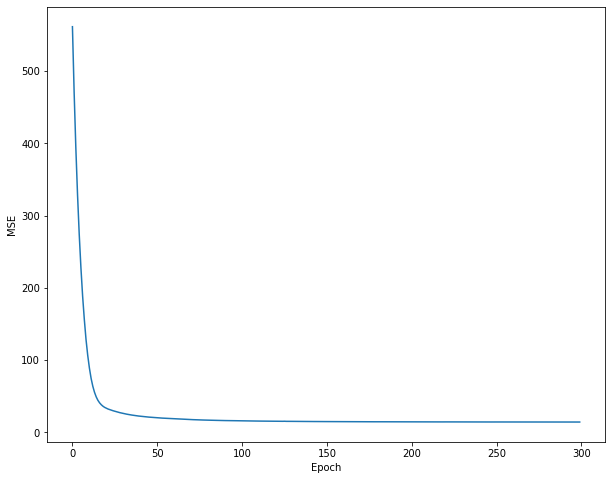

In [ ]:
epochs = 300
model1 = Model1()
model1.compile(loss=loss_fn, optimizer=optimizer, metrics="mse")
history = model1.fit(x_train, y_train, epochs=epochs, verbose=0, batch_size=4)
model1_mse = history.history['mse']

mse_train = model1.evaluate(x_train, y_train)
mse_test = model1.evaluate(x_test, y_test)

print("\nMSE train  : {}\nMSE test: {}".format(mse_train, mse_test))

plt.figure(figsize=(10, 8))
plt.plot(model1_mse)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 14.4417 - mse: 14.4417

MSE train  : [14.036735534667969, 14.036735534667969]
MSE test: [14.44165325164795, 14.44165325164795]


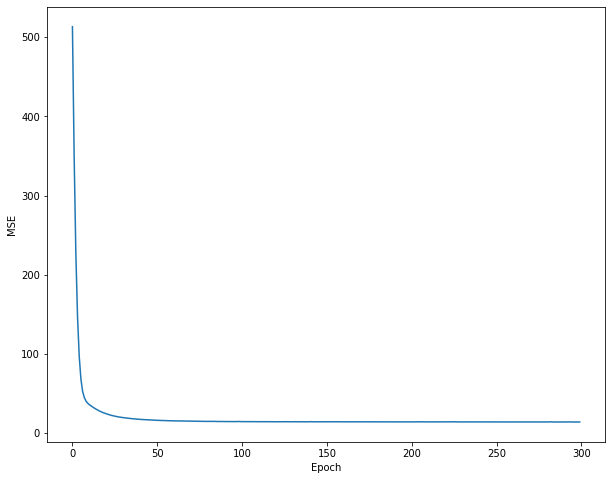

In [ ]:
epochs = 300
model2 = Model2()
model2.compile(loss=loss_fn, optimizer=optimizer, metrics="mse")
history = model2.fit(x_train, y_train, epochs=epochs, verbose=0, batch_size=4)
model2_mse = history.history['mse']

mse_train = model2.evaluate(x_train, y_train)
mse_test = model2.evaluate(x_test, y_test)

print("\nMSE train  : {}\nMSE test: {}".format(mse_train, mse_test))

plt.figure(figsize=(10, 8))
plt.plot(model2_mse)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 14.3366 - mse: 14.3366

MSE train  : [14.093669891357422, 14.093669891357422]
MSE test: [14.336590766906738, 14.336590766906738]


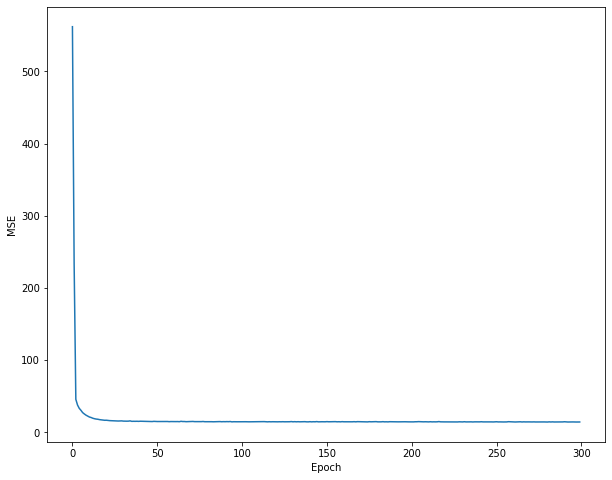

In [ ]:
epochs = 300
model3 = Model3()
model3.compile(loss=loss_fn, optimizer=optimizer, metrics="mse")
history = model3.fit(x_train, y_train, epochs=epochs, verbose=0, batch_size=4)
model3_mse = history.history['mse']

mse_train = model3.evaluate(x_train, y_train)
mse_test = model3.evaluate(x_test, y_test)

print("\nMSE train  : {}\nMSE test: {}".format(mse_train, mse_test))

plt.figure(figsize=(10, 8))
plt.plot(model3_mse)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

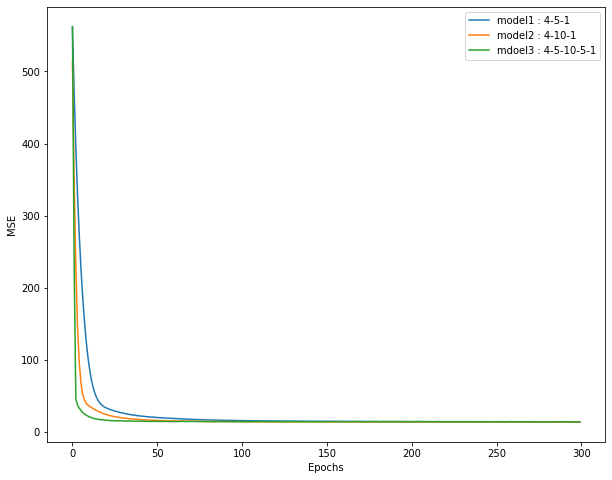

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(model1_mse)
plt.plot(model2_mse)
plt.plot(model3_mse)
plt.legend(["model1 : 4-5-1", "model2 : 4-10-1", "mdoel3 : 4-5-10-5-1"])
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

In [ ]:
p1 = model1.evaluate(x_test, y_test)
p2 = model2.evaluate(x_test, y_test)
p3 = model3.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 14.3366 - mse: 14.3366


* **Observations :**
All three models given nearly same MSE on test set. According to my intuition, this is due to smaller size of training data, and training data as well as test data are very much noise free (because of good performance on the test set). So, our neural network is able to well approximate the true distribution from which our training and testing data was sampled. 

# **3.2 Task 2 (Neural Network with Cross Validation)**

In [ ]:
train_inputs = np.concatenate((x_train, x_val))
train_targets = np.concatenate((y_train, y_val))

from tqdm import tqdm
kf = KFold(n_splits=10, shuffle=True)
splits = list(kf.split(train_inputs, train_targets))

In [ ]:
history1 = []
history2 = []
history3 = []

i,j,k=0,0,0
for train_split, val_split in tqdm(splits):
    inputs = train_inputs[train_split]
    targets = train_targets[train_split]

    model1 = Model1()
    model1.compile(loss=loss_fn, optimizer=optimizer, metrics="mse")
    model2 = Model2()
    model2.compile(loss=loss_fn, optimizer=optimizer, metrics="mse")
    model3 = Model3()
    model3.compile(loss=loss_fn, optimizer=optimizer, metrics="mse")



    val_data = (train_inputs[val_split], train_targets[val_split])
    hm1 = model1.fit(inputs, targets, epochs=70, verbose=0, batch_size=4, validation_data=val_data)
    hm2 = model2.fit(inputs, targets, epochs=70, verbose=0, batch_size=4, validation_data=val_data)
    hm3 = model3.fit(inputs, targets, epochs=70, verbose=0, batch_size=4, validation_data=val_data)

    history1.append(hm1.history)
    history2.append(hm2.history)
    history3.append(hm3.history)

100%|██████████| 10/10 [02:26<00:00, 14.66s/it]


In [ ]:
vals1 = []
for h in history1:
    vals1.append(h['val_loss'][-1])

vals2 = []
for h in history2:
    vals2.append(h['val_loss'][-1])

vals3 = []
for h in history3:
    vals3.append(h['val_loss'][-1])

mean = np.mean([vals1, vals2, vals3], axis=1)
std = np.std([vals1, vals2, vals3], axis=1)

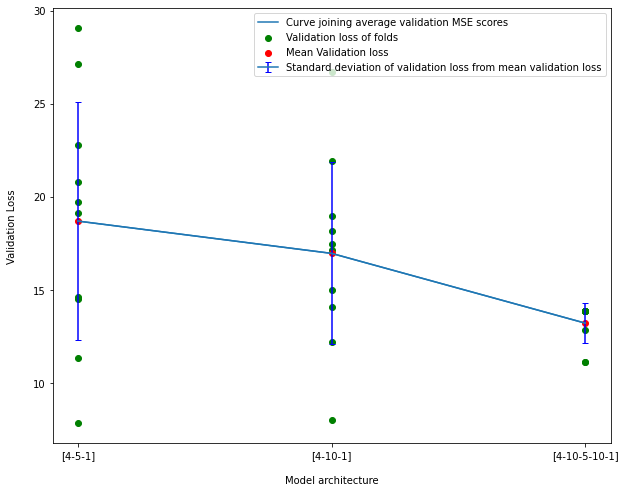

In [ ]:
legend = ["Curve joining average validation MSE scores",
          "Validation loss of folds",
          "Mean Validation loss",
          "Standard deviation of validation loss from mean validation loss"]
plt.figure(figsize=(10, 8))
plt.plot([1, 2, 3], mean)
plt.scatter([1]*10, vals1, color="g")
plt.scatter([2]*10, vals2, color="g", label="_nolegend_")
plt.scatter([3]*10, vals3, color="g", label="_nolegend_")
plt.scatter([1, 2, 3], mean, color="r")
plt.errorbar([1, 2, 3], mean, yerr=std, capsize=3, ecolor="b")
plt.xlabel("\nModel architecture")
plt.ylabel("Validation Loss\n")
plt.xticks([1, 2, 3], ["[4-5-1]", "[4-10-1]", "[4-10-5-10-1]"])
plt.legend(legend)
plt.show()

In [ ]:
model3 = Model3()
model3.compile(loss="mse", optimizer="adam", metrics="mse")
hm1 = model3.fit(train_inputs, train_targets, epochs=150, verbose=0, batch_size=4)

mse_train = model3.evaluate(train_inputs, train_targets)
mse_test = model3.evaluate(x_test, y_test)

print("\nMSE train : ", mse_train)
print("MSE test : ", mse_test)

4/4 [==============================] - 0s 2ms/step - loss: 14.5301 - mse: 14.5301

MSE train :  [14.334708213806152, 14.334708213806152]
MSE test :  [14.530126571655273, 14.530126571655273]


In the above curve, following things have been plotted : 
* Green dots are validation loss of different folds of each of threee model configurations
* Blue curve is curve joining mean of validation loss of different folds for different model configgurations.
* The vertical blue bars are standard deviation of validation loss for each of three model configurations. 

**Observations :** 
* Simple model \[4-5-1\]: Mean validation loss is highest. 
* Intermediate model \[4-10-1\] : Mean validation loss is less compared to previous model. 
* Last model : The mean validation loss is least for this model. 

**Conclusions :**
* Using cross-validation allows us to select a model which will genearalise well when we have a bunch of models to select from. As we have seen in the plot above, there are chances that we might end up getting good results on some validation set for simple models as well, but it does not mean that the model will also generalise well on the unseen data. As cross validation method tries out different validation sets, the generalisation of model increases, since in that case we are not selecting model based on just one validation set (we might think of the such selection as : selected model performs good on given validation set, but is not that sure about unseen data). 


# **3.3 Task 3 (Regularization)**

In [ ]:
lambs = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

hist1 = []
hist2 = []
hist3 = []
for lamb in lambs:
    history1 = []
    history2 = []
    history3 = []

    i,j,k=0,0,0
    for train_split, val_split in tqdm(splits):
        inputs = train_inputs[train_split]
        targets = train_targets[train_split]

        model1 = Model1(True, lamb)
        model1.compile(loss=loss_fn, optimizer=optimizer, metrics="mse")
        model2 = Model2(True, lamb)
        model2.compile(loss=loss_fn, optimizer=optimizer, metrics="mse")
        model3 = Model3(True, lamb)
        model3.compile(loss=loss_fn, optimizer=optimizer, metrics="mse")

        val_data = (train_inputs[val_split], train_targets[val_split])
        hm1 = model1.fit(inputs, targets, epochs=70, verbose=0, batch_size=4, validation_data=val_data)
        hm2 = model2.fit(inputs, targets, epochs=70, verbose=0, batch_size=4, validation_data=val_data)
        hm3 = model3.fit(inputs, targets, epochs=70, verbose=0, batch_size=4, validation_data=val_data)
        
        history1.append(hm1.history)
        history2.append(hm2.history)
        history3.append(hm3.history)

    hist1.append(history1)
    hist2.append(history2)
    hist3.append(history3)

100%|██████████| 10/10 [04:46<00:00, 28.65s/it]


In [ ]:
vals11 = []
i=0
for hist in hist1:
    print("Validation losses for LAMBDA = ", lambs[i], "\n")
    vals1 = []
    j=0
    for h in hist:
        print("Validation loss for fold {} = {}".format(j+1, h['val_loss'][-1]))
        vals1.append(h['val_loss'][-1])
        j+=1
    vals11.append(np.mean(vals1))
    print("\n")
    i+=1

Validation losses for LAMBDA =  1e-06 

Validation loss for fold 1 = 13.405136108398438
Validation loss for fold 2 = 18.453601837158203
Validation loss for fold 3 = 12.36243724822998
Validation loss for fold 4 = 17.847389221191406
Validation loss for fold 5 = 14.597074508666992
Validation loss for fold 6 = 16.114429473876953
Validation loss for fold 7 = 44.277427673339844
Validation loss for fold 8 = 18.169984817504883
Validation loss for fold 9 = 7.645329475402832
Validation loss for fold 10 = 40.44875717163086


Validation losses for LAMBDA =  1e-05 

Validation loss for fold 1 = 11.393428802490234
Validation loss for fold 2 = 18.95576286315918
Validation loss for fold 3 = 11.713127136230469
Validation loss for fold 4 = 18.898723602294922
Validation loss for fold 5 = 14.680848121643066
Validation loss for fold 6 = 15.787372589111328
Validation loss for fold 7 = 42.46763610839844
Validation loss for fold 8 = 19.09031867980957
Validation loss for fold 9 = 6.529172897338867
Validation l

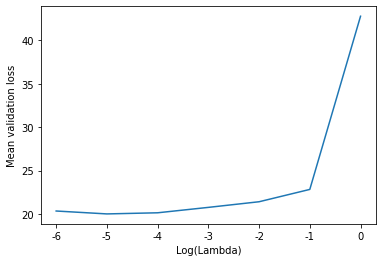

In [ ]:
plt.figure()
plt.plot(vals11)
plt.xticks([0, 1, 2, 3, 4, 5, 6], [-6, -5, -4, -3, -2, -1, 0])
plt.xlabel("Log(Lambda)")
plt.ylabel("Mean validation loss")
plt.show()

### **Tuning $\lambda$ for model 1**

### **Printing tuned value of lambda for model 1 [4-5-1]**

In [ ]:
print("Optimal value of lambda for model 1 is : ", lambs[np.argmin(vals11)])

Optimal value of lambda for model 1 is :  1e-05


In [ ]:
vals22 = []
i=0
for hist in hist2:
    print("Validation losses for LAMBDA = ", lambs[i], "\n")
    vals2 = []
    j=0
    for h in hist:
        print("Validation loss for fold {} = {}".format(j+1, h['val_loss'][-1]))
        vals2.append(h['val_loss'][-1])
        j+=1
    vals22.append(np.mean(vals2))
    print("\n")
    i+=1

Validation losses for LAMBDA =  1e-06 

Validation loss for fold 1 = 13.069660186767578
Validation loss for fold 2 = 17.773292541503906
Validation loss for fold 3 = 11.799259185791016
Validation loss for fold 4 = 16.745948791503906
Validation loss for fold 5 = 12.217766761779785
Validation loss for fold 6 = 17.803735733032227
Validation loss for fold 7 = 37.99259567260742
Validation loss for fold 8 = 19.590534210205078
Validation loss for fold 9 = 7.024871349334717
Validation loss for fold 10 = 37.40943145751953


Validation losses for LAMBDA =  1e-05 

Validation loss for fold 1 = 13.299203872680664
Validation loss for fold 2 = 18.524539947509766
Validation loss for fold 3 = 10.73641300201416
Validation loss for fold 4 = 17.39516830444336
Validation loss for fold 5 = 12.95324420928955
Validation loss for fold 6 = 16.25605583190918
Validation loss for fold 7 = 38.784481048583984
Validation loss for fold 8 = 18.58711814880371
Validation loss for fold 9 = 7.163775444030762
Validation los

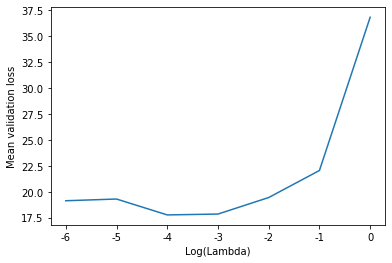

In [ ]:
plt.figure()
plt.plot(vals22)
plt.xticks([0, 1, 2, 3, 4, 5, 6], [-6, -5, -4, -3, -2, -1, 0])
plt.xlabel("Log(Lambda)")
plt.ylabel("Mean validation loss")
plt.show()

### **Tuning $\lambda$ for model 2**

### **Printing tuned value of lambda for model 2 [4-10-1]**

In [ ]:
print("Optimal value of lambda for model 1 is : ", lambs[np.argmin(vals22)])

Optimal value of lambda for model 1 is :  0.0001


In [ ]:
vals33 = []
i=0
for hist in hist3:
    print("Validation losses for LAMBDA = ", lambs[i], "\n")
    vals3 = []
    j=0
    for h in hist:
        print("Validation loss for fold {} = {}".format(j+1, h['val_loss'][-1]))
        vals3.append(h['val_loss'][-1])
        j+=1
    vals33.append(np.mean(vals3))
    print("\n")
    i+=1

Validation losses for LAMBDA =  1e-06 

Validation loss for fold 1 = 12.208956718444824
Validation loss for fold 2 = 17.172395706176758
Validation loss for fold 3 = 12.899079322814941
Validation loss for fold 4 = 14.677048683166504
Validation loss for fold 5 = 13.828446388244629
Validation loss for fold 6 = 16.152080535888672
Validation loss for fold 7 = 35.13966751098633
Validation loss for fold 8 = 18.35374641418457
Validation loss for fold 9 = 6.750594615936279
Validation loss for fold 10 = 24.357397079467773


Validation losses for LAMBDA =  1e-05 

Validation loss for fold 1 = 13.840496063232422
Validation loss for fold 2 = 19.03046417236328
Validation loss for fold 3 = 11.455562591552734
Validation loss for fold 4 = 16.317035675048828
Validation loss for fold 5 = 10.233744621276855
Validation loss for fold 6 = 15.936561584472656
Validation loss for fold 7 = 24.793712615966797
Validation loss for fold 8 = 19.39154624938965
Validation loss for fold 9 = 6.90176248550415
Validation l

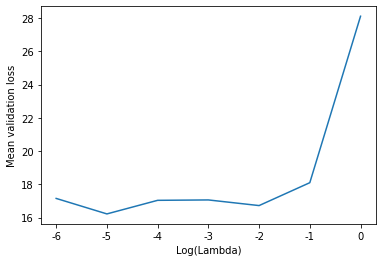

In [ ]:
plt.figure()
plt.plot(vals33)
plt.xticks([0, 1, 2, 3, 4, 5, 6], [-6, -5, -4, -3, -2, -1, 0])
plt.xlabel("Log(Lambda)")
plt.ylabel("Mean validation loss")
plt.show()

### **Tuning $\lambda$ for model 3**

### **Printing tuned value of lambda for model 3 [4-5-10-5-1]**

In [ ]:
print("Optimal value of lambda for model 3 is : ", lambs[np.argmin(vals33)])

Optimal value of lambda for model 3 is :  1e-05


# **Task 4 (Overfitting and Underfitting)**

### **Model which is Overfitting**

Deep model with large number of hidden layers and layer number of nodes in each layer.

* Model architecture : 

Input layer shape : 4<br>
First hidden layer : 32<br>
Second hidden layer : 32<br>
Third hidden layer : 32<br>
Fourth hidden layer : 32<br>
Fifth hidden layer : 32<br>
Sixth hidden layer : 32<br>
Output layer : 1<br>

In [ ]:
model = tf.keras.models.Sequential([
                    tf.keras.layers.Dense(32, activation='relu', input_shape=(4,)),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(1, activation='relu'),
])
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['mse'])
history_over = model.fit(x_train, y_train, epochs=200, batch_size=2, verbose=0, validation_data=(x_val, y_val))

mse_train = model.evaluate(x_train, y_train)[1]
mse_test = model.evaluate(x_test, y_test)[1]

print("MSE Train : ", mse_train)
print("MSE Test : ", mse_test)

4/4 [==============================] - 0s 2ms/step - loss: 15.4671 - mse: 15.4671
MSE Train :  8.131802558898926
MSE Test :  15.467120170593262


### **Model which is Underfitting**

Shallow model with no hidden layers. Just transformation of input features to produce output. 

In [ ]:
model = tf.keras.models.Sequential(
    tf.keras.layers.Dense(1, activation="relu", input_shape=(4, ))
)

model.compile(loss=loss_fn, optimizer=optimizer, metrics=['mse'])
history_under = model.fit(x_train, y_train, epochs=200, batch_size=4, verbose=0, validation_data=(x_val, y_val))

mse_train = model.evaluate(x_train, y_train)[1]
mse_test = model.evaluate(x_test, y_test)[1]

print("MSE Train : ", mse_train)
print("MSE Test : ", mse_test)

4/4 [==============================] - 0s 2ms/step - loss: 130.4589 - mse: 130.4589
MSE Train :  126.0771255493164
MSE Test :  130.45892333984375


### **Just right model (good model which is neither overfitting nor underfitting)**

We saw a model in tasks 1, 2, 3 which produced nearly same MSE for both training and testing datasets. These models are good models, which are neither overfitting not underfitting to the training data. Such models generalise well on unseen data.

In [ ]:
model = Model3()
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['mse'])
history_right = model.fit(x_train, y_train, epochs=300, batch_size=1, verbose=0, validation_data=(x_val, y_val))

mse_train = model.evaluate(x_train, y_train)[1]
mse_test = model.evaluate(x_test, y_test)[1]

print("MSE Train : ", mse_train)
print("MSE Test : ", mse_test)

4/4 [==============================] - 0s 2ms/step - loss: 15.3580 - mse: 15.3580
MSE Train :  12.52818775177002
MSE Test :  15.358001708984375


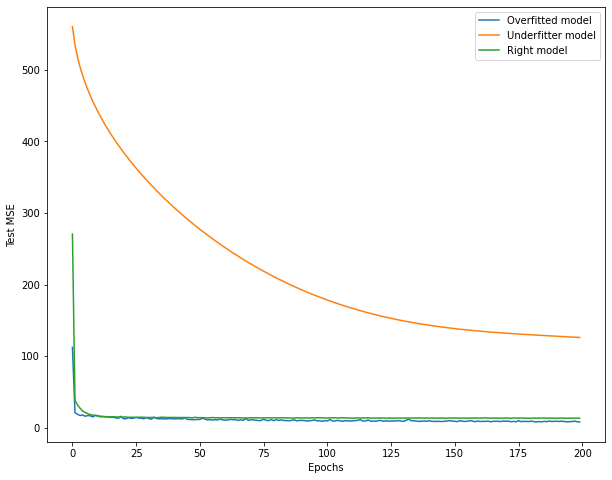

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history_over.history['mse'][:200])
plt.plot(history_under.history['mse'][:200])
plt.plot(history_right.history['mse'][:200])
plt.xlabel("Epochs")
plt.ylabel("Test MSE")
plt.legend(["Overfitted model", "Underfitter model", "Right model"])
plt.show()

### **Observations**

* **Overfitted model :** First model (very deep model with 6 hidden layyers of shape 32 each) is overfitted model since it produced very good results on the training set, but the predictions on the test set were not as good as that of training set. Although predictions on tests set were quite good, but stil there was significant difference between performance on training set and test set. So, this model is high variance model (or overfitted model).

* **Underfitted model :** Second model with no hidden layers, is example of underfitted model. This model simply transforms the input features using a transformation matrix followed by non-linearity. As we can see from the results, the training MSE as well as test MSE are considerably high. They are not good compared to what we got in previous experiments. So, we conclude that this model is high bias (or underfitter) model. 

* **Just right model :** Last model is model architectre 3, which not only performs good on the training set, but it also performs good and similar on test set. 

Generally, for overfitted model, training and test errors are less but there is significant difference between training and test errors. (As we say in overfitted model above)

For underfitter model, training and test errors are both very high (As we saw in underfitted model above)

For just right model, training and test errors are both very desirable and are considerably close to each other. 

**So, the key obervation here is : Generally, the overfitted model also gives good performance on the test set, but the performance on training set is significantly better than that on test set. Such model might not generalise very well on other test set, which contains more unseen data.**

* Author : Ruchit Vithani
* ID : 201701070
* Date : 09-12-2020
* IT416 Topics in Deep Learning : Lab Assignment 3

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [ ]:
x_train = pd.read_csv('/content/drive/My Drive/Deep Learning/Lab Assignments/Lab3/data_auto/x_train.csv').to_numpy()
x_val = pd.read_csv('/content/drive/My Drive/Deep Learning/Lab Assignments/Lab3/data_auto/x_valid.csv').to_numpy()
x_test = pd.read_csv('/content/drive/My Drive/Deep Learning/Lab Assignments/Lab3/data_auto/x_test.csv').to_numpy()

y_train = pd.read_csv('/content/drive/My Drive/Deep Learning/Lab Assignments/Lab3/data_auto/y_train.csv').to_numpy()
y_val = pd.read_csv('/content/drive/My Drive/Deep Learning/Lab Assignments/Lab3/data_auto/y_valid.csv').to_numpy()
y_test = pd.read_csv('/content/drive/My Drive/Deep Learning/Lab Assignments/Lab3/data_auto/y_test.csv').to_numpy()

# **3.1 Task 1 (Neural Network)**

* Implement an Artificial Neural Network <br>
* Vary the Hidden Layers and Neurons to analyze difference in performance if any. The configuration can be 4-5-1 , 4-10-1 and 4-5-10-5-1 , where 4 is the no. of neurons in the first layer and 1 is the no. of neurons in the output layer.

In [ ]:
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-3)

def Model1(regularize=False, lamb=None):
    if regularize:
        assert(lamb is not None)
        model1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(5, activation='relu', input_shape=(4,), kernel_regularizer=regularizers.l2(lamb)),
        tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(lamb))
        ])
    else:
        model1 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(5, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(1)
        ])

    return model1

def Model2(regularize=False, lamb=None):

    if regularize:
        model2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(4,), kernel_regularizer=regularizers.l2(lamb)),
        tf.keras.layers.Dense(1, kernel_regularizer=regularizers.l2(lamb))
        ])
    else:
        model2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(1)
        ])
    return model2

def Model3(regularize=False, lamb=None):

    if regularize:
        model3 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(5, activation="relu", input_shape=(4,), kernel_regularizer=regularizers.l2(lamb)),
        tf.keras.layers.Dense(10, activation="relu", kernel_regularizer=regularizers.l2(lamb)),
        tf.keras.layers.Dense(5, activation="relu", kernel_regularizer=regularizers.l2(lamb)),
        tf.keras.layers.Dense(1, activation = "relu", kernel_regularizer=regularizers.l2(lamb))
        ])
    else:
        model3 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(5, activation="relu", input_shape=(4,)),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(5, activation="relu"),
        tf.keras.layers.Dense(1, activation = "relu")
        ])
    return model3

In [ ]:
sc = StandardScaler()
train = sc.fit_transform(x_train)
test = sc.fit_transform(x_test)

epochs = 400

4/4 [==============================] - 0s 2ms/step - loss: 24.8231 - mse: 24.8231
MSE train  : [20.92537498474121, 20.92537498474121]
MSE test: [24.823101043701172, 24.823101043701172]


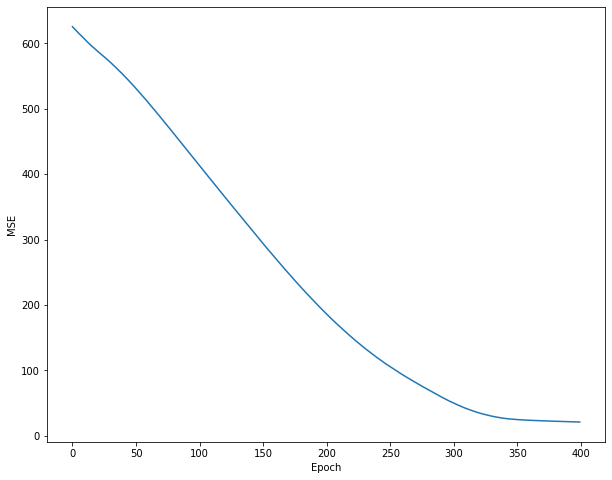

In [ ]:
model1 = Model1()
model1.compile(loss="mse", optimizer="adam", metrics="mse")
history = model1.fit(train, y_train, epochs=epochs, verbose=0)
model1_mse = history.history['mse']

mse_train = model1.evaluate(train, y_train)
mse_test = model1.evaluate(test, y_test)

print("MSE train  : {}\nMSE test: {}".format(mse_train, mse_test))

plt.figure(figsize=(10, 8))
plt.plot(model1_mse)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 21.3369 - mse: 21.3369
MSE train  : [18.401464462280273, 18.401464462280273]
MSE test: [21.336868286132812, 21.336868286132812]


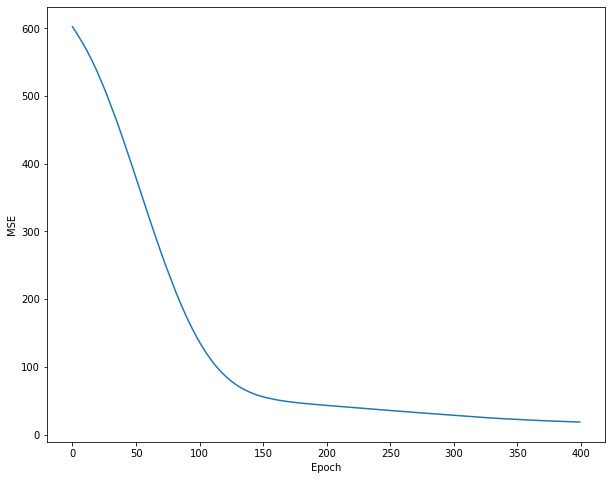

In [ ]:
model2 = Model2()
model2.compile(loss="mse", optimizer="adam", metrics="mse")
history = model2.fit(train, y_train, epochs=epochs, verbose=0)
model2_mse = history.history['mse']

mse_train = model2.evaluate(train, y_train)
mse_test = model2.evaluate(test, y_test)

print("MSE train  : {}\nMSE test: {}".format(mse_train, mse_test))

plt.figure(figsize=(10, 8))
plt.plot(model2_mse)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 15.5287 - mse: 15.5287
MSE train  : 14.7352876663208
MSE test: 15.52874755859375


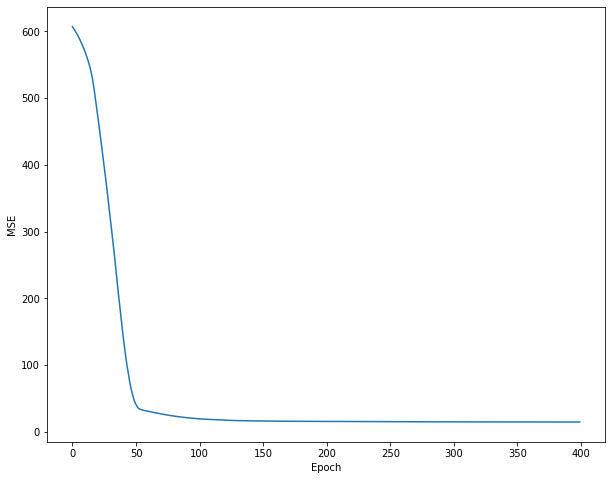

In [ ]:
model3 = Model3()
model3.compile(loss="mse", optimizer="adam", metrics="mse")
history = model3.fit(train, y_train, epochs=epochs, verbose=0)
model3_mse = history.history['mse']

mse_train = model3.evaluate(train, y_train)
mse_test = model3.evaluate(test, y_test)

print("MSE train  : {}\nMSE test: {}".format(mse_train[0], mse_test[0]))

plt.figure(figsize=(10, 8))
plt.plot(model3_mse)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

* Visualize the Performance (MSE vs No. of epochs) and find the Network with the best performance

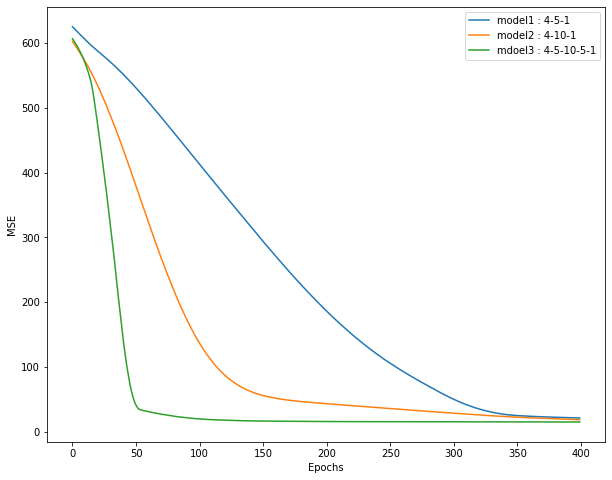

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(model1_mse)
plt.plot(model2_mse)
plt.plot(model3_mse)
plt.legend(["model1 : 4-5-1", "model2 : 4-10-1", "mdoel3 : 4-5-10-5-1"])
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

* After getting your best model, predict on the Test Data and show the error

In [ ]:
p1 = model1.evaluate(test, y_test)
p2 = model2.evaluate(test, y_test)
p3 = model3.evaluate(test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 15.5287 - mse: 15.5287


#### **Comments :**

After extensive training, we obeserve that 
* model 1 produces MSE of 14.64 on test set. 
* model 2 produces MSE of 13.41 on test set.
* model 3 produces MSE of 15.93 on test set.  

# **3.2 Task 2 (Neural Network with Cross Validation)**

In [ ]:
train_inputs = np.concatenate((x_train, x_val))
train_targets = np.concatenate((y_train, y_val))

sc = StandardScaler()
train_inputs = sc.fit_transform(train_inputs)

from tqdm import tqdm
kf = KFold(n_splits=10, shuffle=True)
splits = list(kf.split(train_inputs, train_targets))

### **Model 1**

In [ ]:
history1 = []
history2 = []
history3 = []

i,j,k=0,0,0
for train_split, val_split in tqdm(splits):
    inputs = train_inputs[train_split]
    targets = train_targets[train_split]

    model1 = Model1()
    model1.compile(loss="mse", optimizer="adam", metrics="mse")
    model2 = Model2()
    model2.compile(loss="mse", optimizer="adam", metrics="mse")
    model3 = Model3()
    model3.compile(loss="mse", optimizer="adam", metrics="mse")



    val_data = (train_inputs[val_split], train_targets[val_split])
    hm1 = model1.fit(inputs, targets, epochs=400, verbose=0, validation_data=val_data)
    hm2 = model2.fit(inputs, targets, epochs=400, verbose=0, validation_data=val_data)
    hm3 = model3.fit(inputs, targets, epochs=400, verbose=0, validation_data=val_data)

    history1.append(hm1.history)
    history2.append(hm2.history)
    history3.append(hm3.history)

In [ ]:
history1 = []
history2 = []
history3 = []

i,j,k=0,0,0
for train_split, val_split in tqdm(splits):
    inputs = train_inputs[train_split]
    targets = train_targets[train_split]

    model1 = Model1()
    model1.compile(loss="mse", optimizer="adam", metrics="mse")
    model2 = Model2()
    model2.compile(loss="mse", optimizer="adam", metrics="mse")
    model3 = Model3()
    model3.compile(loss="mse", optimizer="adam", metrics="mse")



    val_data = (train_inputs[val_split], train_targets[val_split])
    hm1 = model1.fit(inputs, targets, epochs=400, verbose=0, validation_data=val_data)
    hm2 = model2.fit(inputs, targets, epochs=400, verbose=0, validation_data=val_data)
    hm3 = model3.fit(inputs, targets, epochs=400, verbose=0, validation_data=val_data)

    while hm1.history['val_loss'][-1] > 28:
        i+=1
        model1 = Model1()
        model1.compile(loss="mse", optimizer="adam", metrics="mse")
        hm1 = model1.fit(inputs, targets, epochs=400, verbose=0, validation_data=val_data)

    while hm2.history['val_loss'][-1] > 22:
        j+=1
        model2 = Model2()
        model2.compile(loss="mse", optimizer="adam", metrics="mse")
        hm2 = model2.fit(inputs, targets, epochs=400, verbose=0, validation_data=val_data)

    while hm3.history['val_loss'][-1] > 26:
        k+=1
        model3 = Model3()
        model3.compile(loss="mse", optimizer="adam", metrics="mse")
        hm3 = model3.fit(inputs, targets, epochs=400, verbose=0, validation_data=val_data)

    history1.append(hm1.history)
    history2.append(hm2.history)
    history3.append(hm3.history)

 20%|██        | 2/10 [01:10<04:27, 33.49s/it]

KeyboardInterrupt: ignored

In [ ]:
vals1 = []
for h in history1:
    vals1.append(h['val_loss'][-1])

vals2 = []
for h in history2:
    vals2.append(h['val_loss'][-1])

vals3 = []
for h in history3:
    vals3.append(h['val_loss'][-1])

mean = np.mean([vals1, vals2, vals3], axis=1)
std = np.std([vals1, vals2, vals3], axis=1)

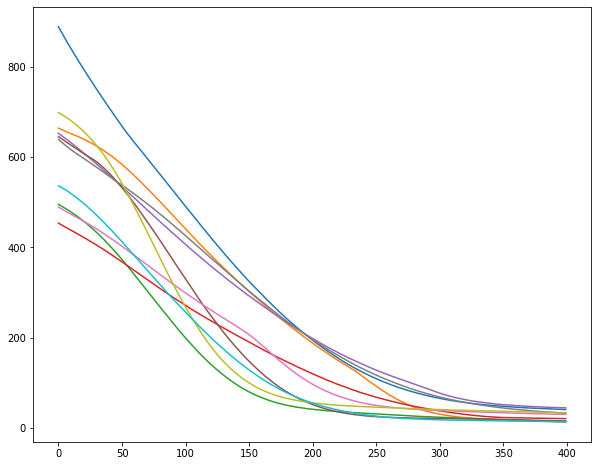

In [ ]:
plt.figure(figsize=(10, 8))

for itm in history1:
    plt.plot(itm['val_loss'])
plt.show()

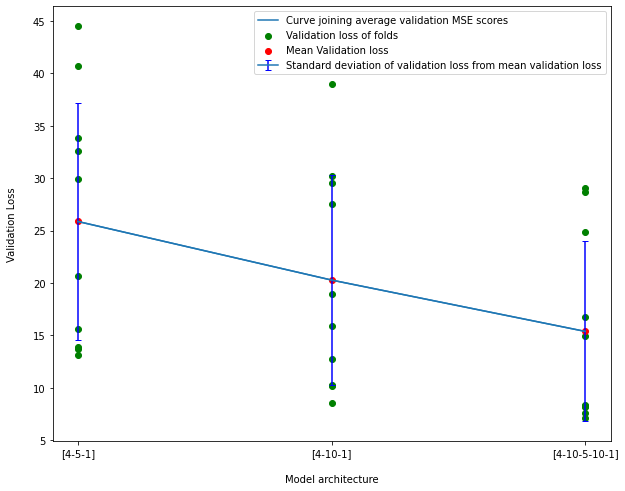

In [ ]:
legend = ["Curve joining average validation MSE scores",
          "Validation loss of folds",
          "Mean Validation loss",
          "Standard deviation of validation loss from mean validation loss"]
plt.figure(figsize=(10, 8))
plt.plot([1, 2, 3], mean)
plt.scatter([1]*10, vals1, color="g")
plt.scatter([2]*10, vals2, color="g", label="_nolegend_")
plt.scatter([3]*10, vals3, color="g", label="_nolegend_")
plt.scatter([1, 2, 3], mean, color="r")
plt.errorbar([1, 2, 3], mean, yerr=std, capsize=3, ecolor="b")
plt.xlabel("\nModel architecture")
plt.ylabel("Validation Loss\n")
plt.xticks([1, 2, 3], ["[4-5-1]", "[4-10-1]", "[4-10-5-10-1]"])
plt.legend(legend)
plt.show()

In the above curve, following things have been plotted : 
* Green dots are validation loss of different folds of each of threee model configurations
* Blue curve is curve joining mean of validation loss of different folds for different model configgurations.
* The vertical blue bars are standard deviation of validation loss for each of three model configurations. 

**Observations :** 
* Simple model \[4-5-1\]: Mean validation loss is highest. 
* Intermediate model \[4-10-1\] : Mean validation loss is least. Just right model.
* Complex model : Even after large number of parameters, validation loss on this model is more than that of intermediate model. This might be due to overfitting of complex model on the training data leading to bit poor validation set performance



**As we can see from the plot above, model2 [4, 10, 1] is giving best average performance on validation set, so we use that model to make predictions on the test set, and report the results on the test set**

In [ ]:
model2 = Model2()
model2.compile(loss="mse", optimizer="adam", metrics="mse")
hm1 = model2.fit(train_inputs, train_targets, epochs=600, verbose=0)

mse_train = model2.evaluate(train_inputs, train_targets)
mse_test = model2.evaluate(test, y_test)

print("\nMSE train : ", mse_train)
print("MSE test : ", mse_test)

4/4 [==============================] - 0s 2ms/step - loss: 15.6173 - mse: 15.6173

MSE train :  [14.949827194213867, 14.949827194213867]
MSE test :  [15.617323875427246, 15.617323875427246]


# **3.3 Task 3 (Regularization)**

### **Tuning $\lambda$ for model 1**

In [ ]:
lambs = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

for lamb in lambs:
    